# Image Captioning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image-Captioning" data-toc-modified-id="Image-Captioning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image Captioning</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Architecture" data-toc-modified-id="Architecture-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Architecture</a></span></li><li><span><a href="#Implementation-in-arcgis.learn" data-toc-modified-id="Implementation-in-arcgis.learn-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Implementation in <code>arcgis.learn</code></a></span></li><li><span><a href="#References" data-toc-modified-id="References-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></li></ul></div>

Deep learning has been achieving superhuman level performance in computer vision that can do object classification, object detection, or semantic segmentation of different features. On the other hand, natural language processing models perform well on tasks such as named entity recognition, text classification, etc. This guide explains a new model which is a combination of both image and text. Image captioning model, as the name suggests, generates textual captions of an image. Like all supervised learning scenarios, this model also requires labelled training data in order to train a model. Image captioning technique is mostly done on images taken from handheld camera, however, research continues to explore captioning for remote sensing images. These could help describe the features on the map for accessibility purposes.
Figure 1 shows an example of a few images from the RSICD dataset [1]. This dataset contains up to 5 unique captions for ~11k images.

<figure>
    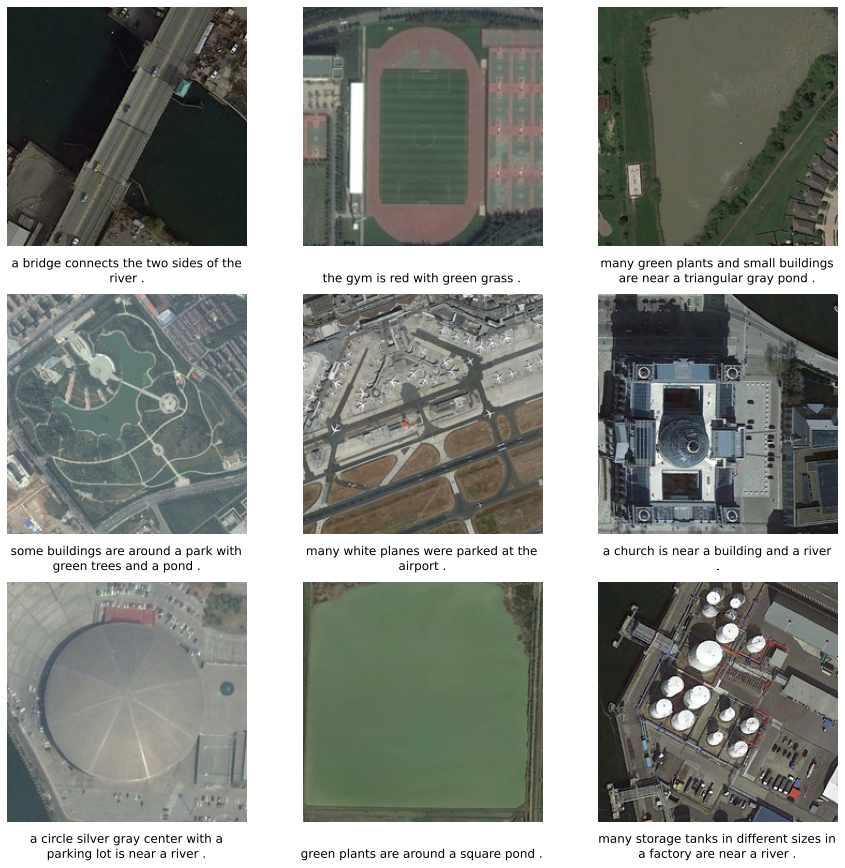
    <br>
    <center>
    <figcaption>Figure 1. Training data for remote sensing image captioning. [1] </figcaption>
    </center>
</figure>

### Architecture

The image captioning model consists of an encoder and a decoder. The encoder extracts out important features from the image. The decoder takes those features as inputs and uses them to generate the caption.  Typically, we use [ImageNet](http://www.image-net.org/) Pretrained networks like [VGGNet](https://arxiv.org/abs/1409.1556) or [ResNet](https://arxiv.org/abs/1512.03385) as the encoder for the image. The decoder is a language model that takes in current word and image features as an input and outputs the next word. The words are generated sequentially to complete the caption. The neural networks that are quite apt for this case are Recurrent Neural Networks (RNNs), specifically [Long Short Term Memory (LSTMs)](https://www.bioinf.jku.at/publications/older/2604.pdf) or [Gated Recurrent Units (GRUs)](https://arxiv.org/abs/1412.3555). Some research has also been done to incorporate recently [transformers](https://arxiv.org/abs/1706.03762) as the decoder [4].


**Attention Mechanism:** The attention mechanism in image captioning attends to a portion of the image before generating the next word. So, the model can decide where to look in the image to generate the next word. This technique had been proposed in **Show, Attend, and Tell** paper [2]. A figure of this mechanism, along with complete architecture, is shown below. 

<figure>
    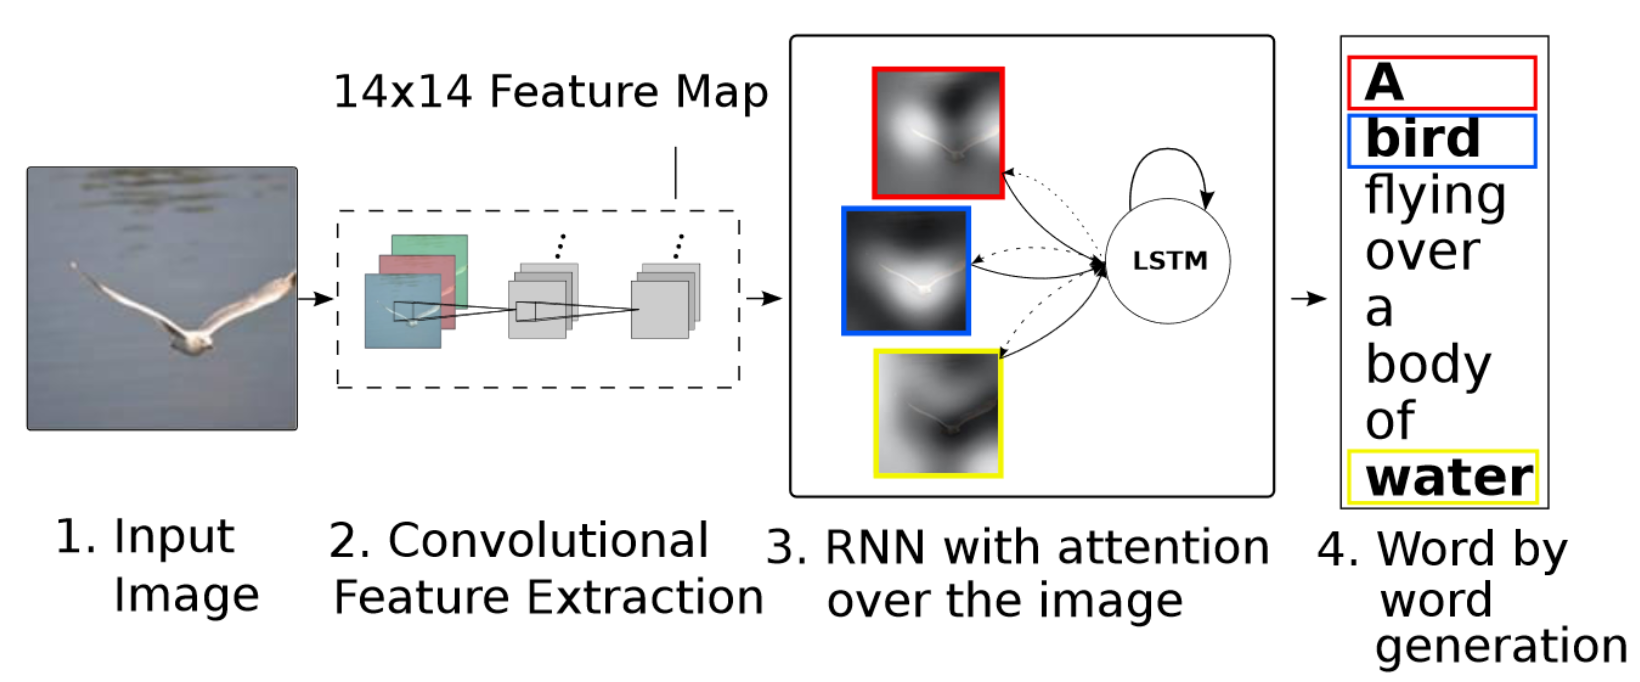
    <br>
    <center>
    <figcaption>Figure 2. Image captioning architecture with attention [2] </figcaption>
    </center>
</figure>

### Implementation in `arcgis.learn`

In `arcgis.learn`, we have used the architecture shown in Figure 2. It currently supports only the **RSICD dataset**  [1] for image captioning due to the lack of remote sensing captioning data. Other datasets are available, i.e., **UC Merced Captions** [3] and **Sydney Captions** [3], but they are not readily accessible. The RSICD dataset size is pretty decent in size as well as diverse, allowing the image captioning model to learn reasonable captions.



We need to put the RSICD dataset in a specific format, i.e., a root folder containing a folder named "*images*" and the JSON file containing the annotations named "*annotations.json*". The specific format of the json can be seen [here](https://github.com/201528014227051/RSICD_optimal/blob/master/dataset_rsicd.json). 

<figure>
    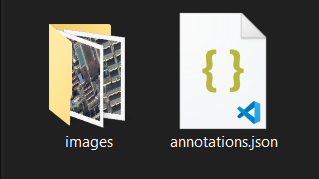
    <br>
    <center>
    <figcaption>Figure 3. Folder structure for RSICD dataset. A root folder containing "<i>images</i>" folder and "<i>annotations.json</i>" file.</figcaption>
    </center>
</figure>

When we have data in this specific format, we can call the `prepare_data` function with `dataset_type='ImageCaptioning'`, we can then use the data object and pass that into the `ImageCaptioner` class to train the model using the ArcGIS workflow. The `ImageCaptioner` class can be initialized as follows.

```python
from arcgis.learn import ImageCaptioner
ic = ImageCaptioner(data)
```

Advanced users can play with the internal architecture of the model by passing a keyword argument `decoder_params` as show below.

```python
ic = ImageCaptioner(data, 
                    decoder_params={
                                    'embed_size':100,  # Size of word embedding to be used during training.
                                    'hidden_size':100, # Size of hidden activations in the LSTM
                                    'attention_size':100, # Size of attention vectors
                                    'teacher_forcing':1, # Probability of using teacher forcing during training.
                                    'dropout':0.1, # Dropout probability for regularization.
                                    'pretrained_emb':False #If true, it will use pretrained fasttext embeddings.
                                    }
                   )
```

Once the model object is created we can use that to train the model using the `fit` method.

### References


* [1] Xiaoqiang Lu, Binqiang Wang, Xiangtao Zheng, Xuelong Li: “Exploring Models and Data for Remote Sensing Image Caption Generation”, 2017; <a href='http://arxiv.org/abs/1712.07835'>arXiv:1712.07835</a>. DOI: <a href='https://ieeexplore.ieee.org/document/8240966'>10.1109/TGRS.2017.2776321</a>.

* [2] Xu, K., Ba, J., Kiros, R., Cho, K., Courville, A., Salakhudinov, R., Zemel, R. and Bengio, Y., 2015, June. Show, attend and tell: Neural image caption generation with visual attention. In International conference on machine learning (pp. 2048-2057).

* [3] B.  Qu,  X.  Li,  D.  Tao,  and  X.  Lu,  “Deep  semantic  understanding  of high  resolution  remote  sensing  image,” International  Conference  onComputer,  Information  and  Telecommunication  Systems,  pp.  124–128,2016.

* [4] Desai, K., & Johnson, J. (2020). VirTex: Learning Visual Representations from Textual Annotations. arXiv preprint arXiv:2006.06666.